In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 8
fig_height = 5
fig_format = 'png'
fig_dpi = 200
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/development/projects/active/HIRT/docs/build-guide':
  os.chdir(r'/development/projects/active/HIRT/docs/build-guide')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1767871850.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1767871850.0, "/usr/lib/python3.12/zipimport.py": 1767871850.0, "/usr/lib/python3.12/codecs.py": 1767871850.0, "/usr/lib/python3.12/encodings/aliases.py": 1767871850.0, "/usr/lib/python3.12/encodings/__init__.py": 1767871850.0, "/usr/lib/python3.12/encodings/utf_8.py": 1767871850.0, "/usr/lib/python3.12/abc.py": 1767871850.0, "/usr/lib/python3.12/io.py": 1767871850.0, "/usr/lib/python3.12/stat.py": 1767871850.0, "/usr/lib/python3.12/_collections_abc.py": 1767871850.0, "/usr/lib/python3.12/genericpath.py": 1767871850.0, "/usr/lib/python3.12/posixpath.py": 1767871850.0, "/usr/lib/python3.12/os.py": 1767871850.0, "/usr/lib/python3.12/_sitebuiltins.py": 1767871850.0, "/usr/lib/python3/dist-packages/_distutils_hack/__init__.py": 1692360458.0, "/usr/lib/python3/dist-packages/apport_python_hook.py": 1713443495.0, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/

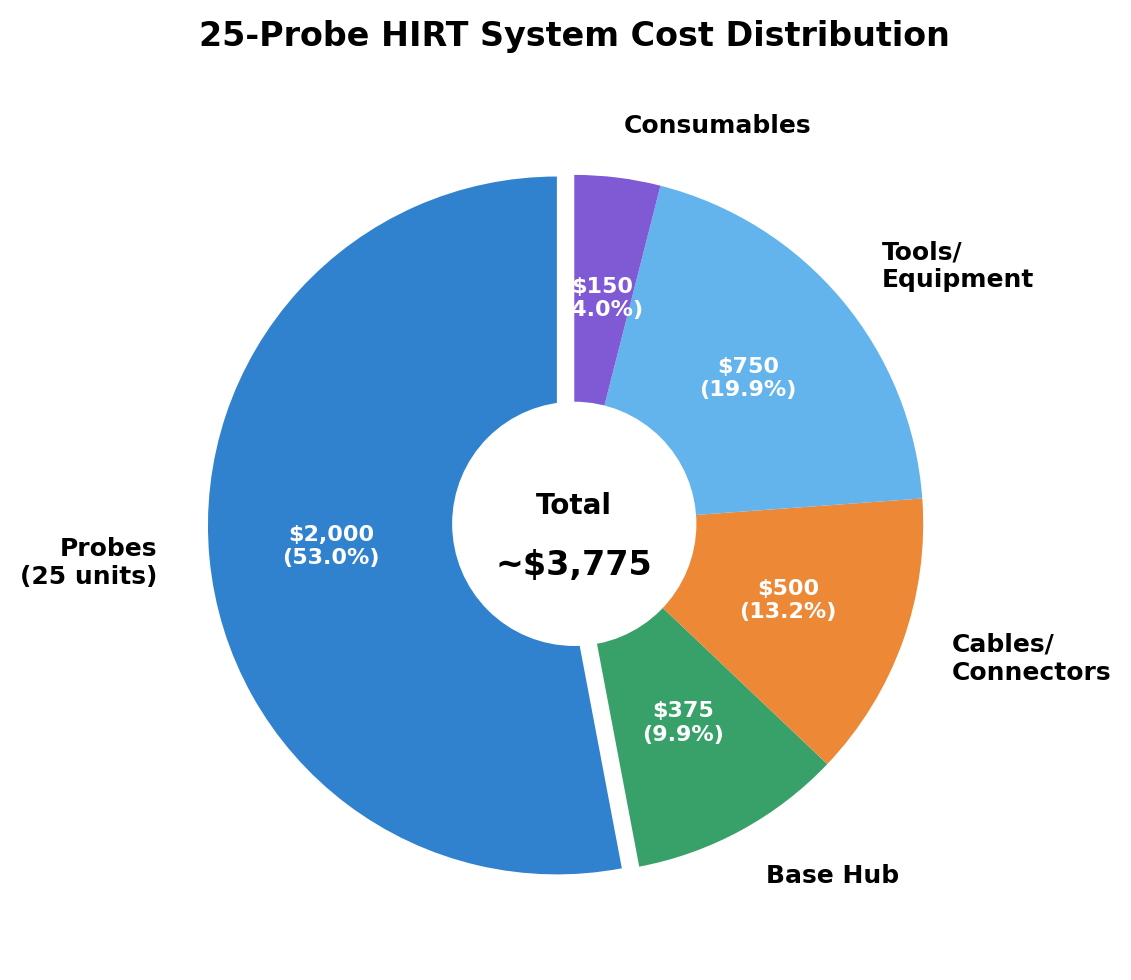

In [2]:
#| label: fig-cost-breakdown
#| fig-cap: Cost distribution for a 25-probe HIRT system showing the relative investment in each component category. Probes represent the largest expense due to quantity.
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np

# Cost categories with mid-range estimates
categories = ['Probes\n(25 units)', 'Base Hub', 'Cables/\nConnectors',
              'Tools/\nEquipment', 'Consumables']
costs = [2000, 375, 500, 750, 150]
total = sum(costs)

# Colors
colors = ['#3182ce', '#38a169', '#ed8936', '#63b3ed', '#805ad5']

fig, ax = plt.subplots(figsize=(8, 5))

# Explode the largest segment slightly
explode = (0.05, 0, 0, 0, 0)

# Create pie chart
wedges, texts, autotexts = ax.pie(
    costs,
    explode=explode,
    labels=categories,
    colors=colors,
    autopct=lambda pct: f'${int(pct/100*total):,}\n({pct:.1f}%)',
    startangle=90,
    pctdistance=0.65,
    labeldistance=1.15
)

# Style the text
for text in texts:
    text.set_fontsize(9)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add center circle for donut effect
center_circle = plt.Circle((0, 0), 0.35, fc='white')
ax.add_patch(center_circle)

# Add total in center
ax.text(0, 0.05, 'Total', ha='center', va='center', fontsize=10, fontweight='bold')
ax.text(0, -0.12, '~$3,775', ha='center', va='center', fontsize=12, fontweight='bold')

ax.set_title('25-Probe HIRT System Cost Distribution', fontsize=12, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

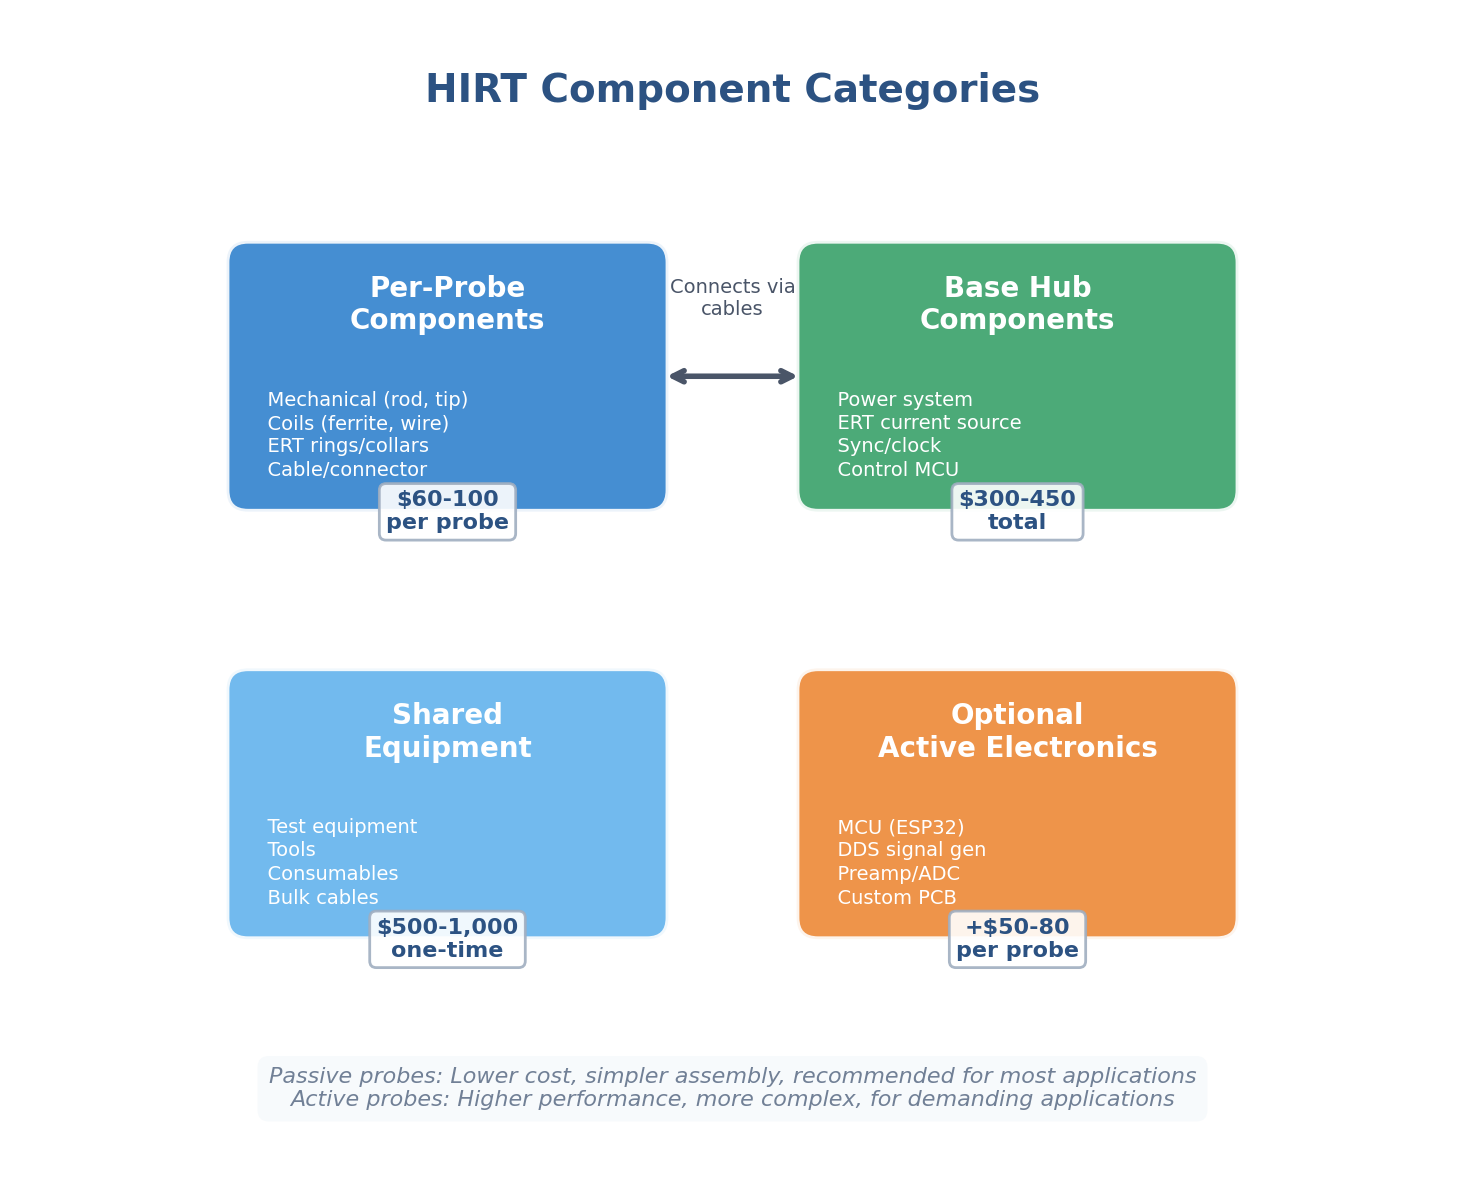

In [3]:
#| label: fig-component-categories
#| fig-cap: 'HIRT component categories showing the relationship between per-probe components, base hub electronics, shared equipment, and optional active probe upgrades.'
#| code-fold: true

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Rectangle

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.axis('off')

# Title
ax.text(5, 7.5, 'HIRT Component Categories', ha='center', va='center',
        fontsize=14, fontweight='bold', color='#2c5282')

# Define category boxes
categories = [
    {
        'name': 'Per-Probe\nComponents',
        'x': 1.5, 'y': 5.5, 'width': 3, 'height': 1.8,
        'color': '#3182ce',
        'items': ['Mechanical (rod, tip)', 'Coils (ferrite, wire)',
                 'ERT rings/collars', 'Cable/connector']
    },
    {
        'name': 'Base Hub\nComponents',
        'x': 5.5, 'y': 5.5, 'width': 3, 'height': 1.8,
        'color': '#38a169',
        'items': ['Power system', 'ERT current source',
                 'Sync/clock', 'Control MCU']
    },
    {
        'name': 'Shared\nEquipment',
        'x': 1.5, 'y': 2.5, 'width': 3, 'height': 1.8,
        'color': '#63b3ed',
        'items': ['Test equipment', 'Tools',
                 'Consumables', 'Bulk cables']
    },
    {
        'name': 'Optional\nActive Electronics',
        'x': 5.5, 'y': 2.5, 'width': 3, 'height': 1.8,
        'color': '#ed8936',
        'items': ['MCU (ESP32)', 'DDS signal gen',
                 'Preamp/ADC', 'Custom PCB']
    }
]

for cat in categories:
    box = FancyBboxPatch(
        (cat['x'], cat['y'] - cat['height']/2),
        cat['width'], cat['height'],
        boxstyle="round,pad=0.05,rounding_size=0.15",
        facecolor=cat['color'],
        edgecolor='white',
        linewidth=2,
        alpha=0.9
    )
    ax.add_patch(box)

    ax.text(cat['x'] + cat['width']/2, cat['y'] + 0.5,
            cat['name'], ha='center', va='center',
            fontsize=10, fontweight='bold', color='white')

    item_text = '\n'.join([f'  {item}' for item in cat['items']])
    ax.text(cat['x'] + 0.15, cat['y'] - 0.1, item_text,
            ha='left', va='top', fontsize=7, color='white',
            linespacing=1.3)

# Cost annotations
cost_info = [
    (1.5, 4.7, '$60-100\nper probe'),
    (5.5, 4.7, '$300-450\ntotal'),
    (1.5, 1.7, '$500-1,000\none-time'),
    (5.5, 1.7, '+$50-80\nper probe')
]

for x, y, text in cost_info:
    ax.text(x + 1.5, y, text, ha='center', va='top',
            fontsize=8, fontweight='bold', color='#2c5282',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                     edgecolor='#a0aec0', alpha=0.9))

# Connection arrows
ax.annotate('', xy=(5.5, 5.5), xytext=(4.5, 5.5),
            arrowprops=dict(arrowstyle='<->', color='#4a5568', lw=2))
ax.text(5, 5.9, 'Connects via\ncables', ha='center', va='bottom', fontsize=7,
        color='#4a5568')

# Legend
ax.text(5, 0.5,
        'Passive probes: Lower cost, simpler assembly, recommended for most applications\n'
        'Active probes: Higher performance, more complex, for demanding applications',
        ha='center', va='center', fontsize=8, style='italic', color='#718096',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#f7fafc', edgecolor='none'))

plt.tight_layout()
plt.show()